## 講座 2.3　matplotlib 入門

In [1]:
# 取得中文字型
!wget 'https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf'

--2021-12-23 07:49:02--  https://github.com/flyingpath/electron-hand-dicom/raw/master/TaipeiSansTCBeta-Regular.ttf
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf [following]
--2021-12-23 07:49:02--  https://raw.githubusercontent.com/flyingpath/electron-hand-dicom/master/TaipeiSansTCBeta-Regular.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  --.-KB/s    in 0.1s    

2021-12-23 07:49:03 

In [2]:
# 共通事前處理

# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14

# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'

### 1. 利用 plt 繪製簡單的圖形

#### 散佈圖

In [3]:
# 準備資料
import seaborn as sns
df_iris = sns.load_dataset("iris") 

# 確認結果
display(df_iris.head())

# 散佈圖 x 座標用 Series
xs = df_iris['sepal_length']

# 散佈圖 y 座標用陣列 Series
ys = df_iris['sepal_width']

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


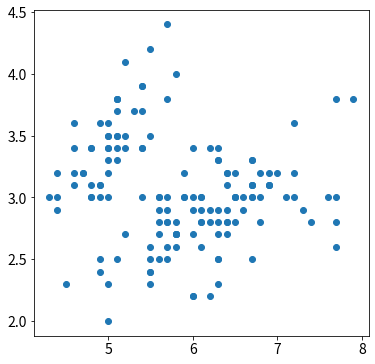

In [4]:
# 設定大小
plt.rcParams['figure.figsize'] = (6, 6)

# 散佈圖
plt.scatter(xs, ys)

# 顯示圖形
plt.show()

#### 函數圖形

In [5]:
# 準備資料

# 定義 sigmoid 函數
def sigmoid(x, a):
    return 1/(1 + np.exp(-a*x))

# 繪製圖形用 x 座標串列
xp = np.linspace(-3, 3, 61)

#### 單純方式的範例

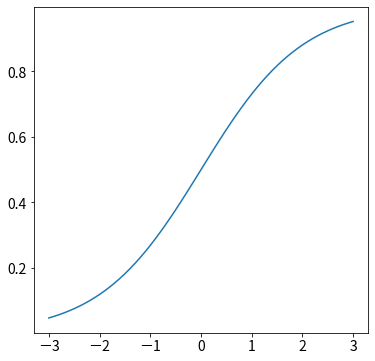

In [6]:
# 設定大小
plt.rcParams['figure.figsize'] = (6, 6)

# 繪製圖形
plt.plot(xp, sigmoid(xp, 1.0))

# 顯示圖形
plt.show()

#### 複雜方式的範例

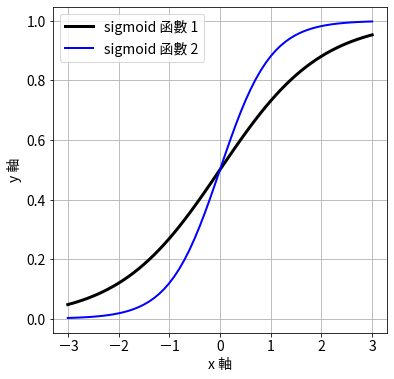

In [7]:
# 設定大小
plt.rcParams['figure.figsize'] = (6, 6)

# 繪製帶有標籤的圖形 #1
plt.plot(xp, sigmoid(xp, 1.0), 
         label='sigmoid 函數 1', lw=3, c='k')

# 繪製帶有標籤的圖形 #2
plt.plot(xp, sigmoid(xp, 2.0), 
         label='sigmoid 函數 2', lw=2, c='b')

# 顯示網格
plt.grid()

# 顯示圖例
plt.legend()

# 顯示軸
plt.xlabel('x 軸')
plt.ylabel('y 軸')

# 顯示圖形
plt.show()

### 2. 利用 fig, ax 繪製複雜的圖形

#### 時間序列圖

In [8]:
# 準備資料

# 冰淇淋消費金額
df_ice = pd.read_excel('https://github.com/makaishi2\
/sample-data/blob/master/data/ice-sales.xlsx?raw=true', 
    sheet_name=0)

# 確認結果
display(df_ice.head())

,年月,支出
0,2015-01-01,401
1,2015-02-01,345
2,2015-03-01,480
3,2015-04-01,590
4,2015-05-01,928


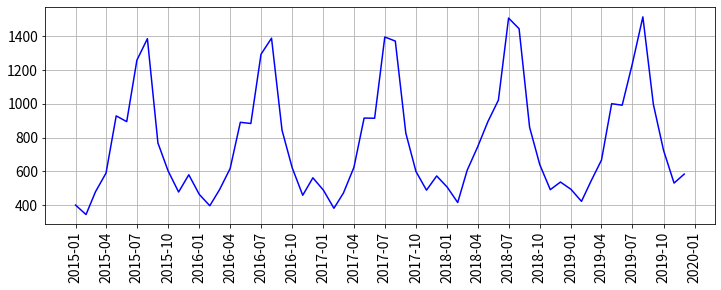

In [9]:
# 取得變數 ax
# 同時也指定大小
fig, ax = plt.subplots(figsize=(12, 4))

# 繪製圖形
ax.plot(df_ice['年月'], df_ice['支出'], c='b')

# 日期設定用函式庫
import matplotlib.dates as mdates

# 設定刻度間隔為 3 個月
days = mdates.MonthLocator(bymonth=range(1,13,3))
ax.xaxis.set_major_locator(days)

# 將 x 軸標籤旋轉 90 度
ax.tick_params(axis='x', rotation=90)

# 顯示網格
ax.grid()

# 顯示圖形
plt.show()

### 3. 利用 subplot 同時繪製多個圖形

#### 同時繪製多個圖形

In [23]:
# 準備資料

# 手寫數字資料
# 請注意，這會需要花點時間
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# 影像資料
image = mnist.data
# 標準答案
label = mnist.target

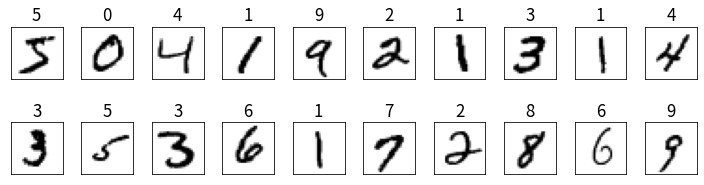

In [25]:
# 指定大小
plt.figure(figsize=(10, 3))

# 繪製 20 張影像
for i in range(20): 
    
    # 取得第 i 個 ax 變數
    ax = plt.subplot(2, 10, i+1)
    
    # 取得第 i 筆影像資料並轉換成 28x28
    img = image[i].reshape(28,28)
    
    # 繪製出 img 的影像
    ax.imshow(img, cmap='gray_r')
    
    # 在標題中顯示標準答案
    ax.set_title(label[i])
    
    # 隱藏 x, y 的刻度
    ax.set_xticks([])
    ax.set_yticks([])
    
# 避免與相鄰物件重疊
plt.tight_layout()

# 顯示圖形
plt.show() 

### 4. 利用資料框繪製圖形

#### 繪製直方圖

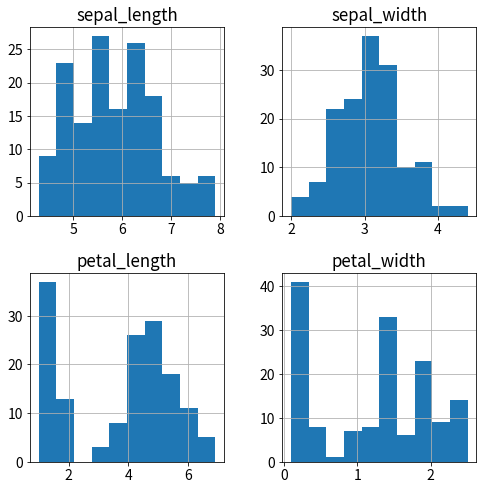

In [26]:
# 繪製直方圖

# 設定大小
plt.rcParams['figure.figsize'] = (8, 8)

# 直方圖
df_iris.hist()

# 顯示
plt.show()

#### 利用 value_counts 的結果繪製長條圖

In [27]:
# 準備資料

# 統計 df_iris['sepal_width'] 中各值的數量，並取得數量最多的前 5 種
counts_ser = df_iris['sepal_width'].value_counts().iloc[:5]

# 確認結果
print(counts_ser)

3.0    26
2.8    14
3.2    13
3.4    12
3.1    11
Name: sepal_width, dtype: int64


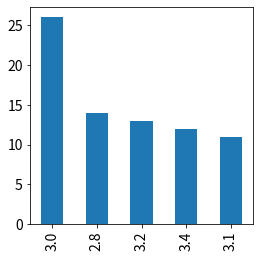

In [28]:
# 利用 value_counts 的結果繪製長條圖

# 設定大小
plt.rcParams['figure.figsize'] = (4, 4)

# 利用 Series 資料繪製長條圖
counts_ser.plot(kind='bar')

# 顯⽰圖形
plt.show()